In [1]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv("adult income1.csv")

In [6]:
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,native.country,income
0,17,Private,148522,11th,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K
1,17,Private,93235,12th,8,Never-married,occupation,Own-child,White,Female,United-States,<=50K
2,17,Private,184924,9th,5,Never-married,occupation,Own-child,White,Male,United-States,<=50K
3,17,Private,116626,11th,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K
4,17,Private,209949,11th,7,Never-married,occupation,Own-child,White,Female,United-States,<=50K


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31947 entries, 0 to 31946
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             31947 non-null  int64 
 1   workclass       31947 non-null  object
 2   fnlwgt          31947 non-null  int64 
 3   education       31947 non-null  object
 4   education.num   31947 non-null  int64 
 5   marital.status  31947 non-null  object
 6   occupation      31947 non-null  object
 7   relationship    31947 non-null  object
 8   race            31947 non-null  object
 9   sex             31947 non-null  object
 10  native.country  31947 non-null  object
 11  income          31947 non-null  object
dtypes: int64(3), object(9)
memory usage: 2.9+ MB


In [8]:
df.describe()

,age,fnlwgt,education.num
count,31947.000000,3.194700e+04,31947.000000
mean,38.570695,1.897319e+05,10.071149
std,13.646280,1.057567e+05,2.561430
min,17.000000,1.228500e+04,1.000000
25%,28.000000,1.176275e+05,9.000000
50%,37.000000,1.783120e+05,10.000000
75%,48.000000,2.374535e+05,12.000000
max,90.000000,1.484705e+06,16.000000


In [9]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
native.country    0
income            0
dtype: int64

In [10]:
df.shape

(31947, 12)

In [11]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [12]:
df['TARGET'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [13]:
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,native.country,income,TARGET
0,17,Private,148522,11th,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K,0
1,17,Private,93235,12th,8,Never-married,occupation,Own-child,White,Female,United-States,<=50K,0
2,17,Private,184924,9th,5,Never-married,occupation,Own-child,White,Male,United-States,<=50K,0
3,17,Private,116626,11th,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K,0
4,17,Private,209949,11th,7,Never-married,occupation,Own-child,White,Female,United-States,<=50K,0


In [14]:
df['occupation'].value_counts()

occupation
Craft-repair         3838
Prof-specialty       3732
Exec-managerial      3696
Adm-clerical         3595
Sales                3388
Other-service        3148
Machine-op-inspct    1902
?                    1785
Transport-moving     1500
occupation           1462
Handlers-cleaners    1317
Farming-fishing       957
Tech-support          861
Protective-serv       617
Priv-house-serv       141
Armed-Forces            8
Name: count, dtype: int64

In [15]:
df['occupation'] = df['occupation'].replace('?', np.nan)

In [16]:
df['TARGET'].value_counts()

TARGET
0    24264
1     7683
Name: count, dtype: int64

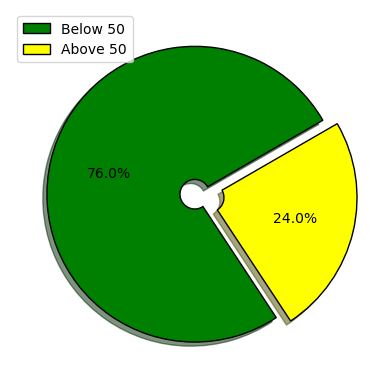

In [17]:
plt.pie(df['TARGET'].value_counts(), explode=[0,0.1], wedgeprops={'edgecolor':'k', 'width':0.9}, shadow=True, colors=['green', 'yellow'],
        autopct='%1.1f%%', startangle=30)
plt.legend(loc='upper left', labels=['Below 50', 'Above 50'])
plt.show()

In [18]:
df['sex'].value_counts()

sex
Male      21349
Female    10598
Name: count, dtype: int64

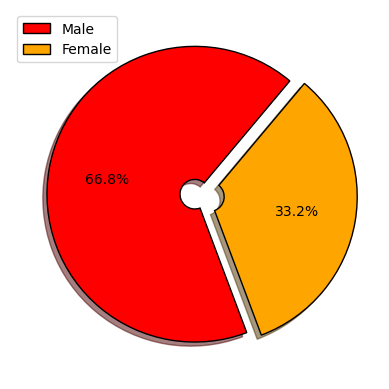

In [19]:
plt.pie(df['sex'].value_counts(), explode=[0,0.1], wedgeprops={'edgecolor':'k', 'width':0.9}, shadow=True, colors=['red', 'orange'],
        autopct='%1.1f%%', startangle=50)
plt.legend(loc='upper left', labels=['Male', 'Female'])
plt.show()

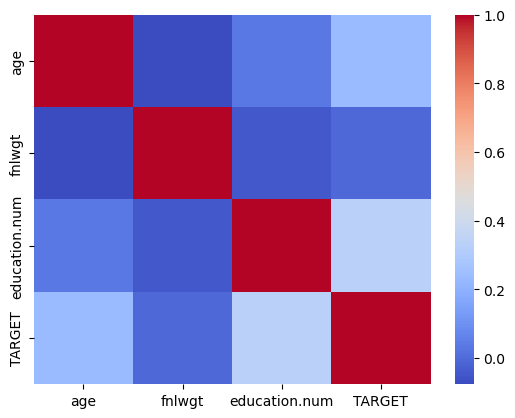

In [20]:
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')
plt.show()

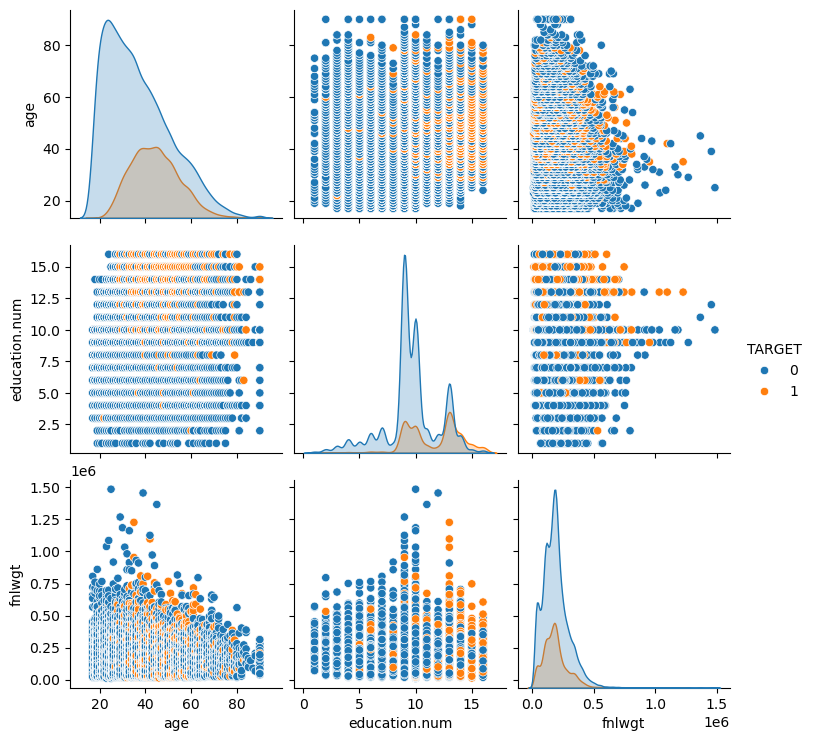

In [21]:
sns.pairplot(df[['age', 'education.num', 'fnlwgt', 'TARGET']], hue='TARGET')

In [22]:
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,native.country,income,TARGET
0,17,Private,148522,11th,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K,0
1,17,Private,93235,12th,8,Never-married,occupation,Own-child,White,Female,United-States,<=50K,0
2,17,Private,184924,9th,5,Never-married,occupation,Own-child,White,Male,United-States,<=50K,0
3,17,Private,116626,11th,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K,0
4,17,Private,209949,11th,7,Never-married,occupation,Own-child,White,Female,United-States,<=50K,0


In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
from sklearn.impute import SimpleImputer

In [25]:
ohe = OneHotEncoder(handle_unknown='ignore')

In [26]:
sm = SimpleImputer(strategy='most_frequent')

In [27]:
X = df.drop(columns={'education', 'fnlwgt', 'TARGET', 'income'})

In [28]:
y = df['TARGET']

In [29]:
X['occupation'] = sm.fit_transform(X[['occupation']]).ravel()

In [30]:
from sklearn.compose import make_column_transformer

In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
smt = SMOTE(random_state=42)

In [33]:
col_transformer = make_column_transformer(
    (ohe, ['workclass', 'occupation', 'relationship', 'native.country', 'sex', 'race', 'marital.status']),
    remainder='passthrough'
)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rfc = RandomForestClassifier(n_jobs=-1, random_state=48)

In [38]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imb_pipe 

In [39]:
pipe = imb_pipe([
    ('preprocessor', col_transformer),
    ('smote', smt),
    ('classifier', rfc)
])

In [40]:
from sklearn.model_selection import StratifiedKFold

In [41]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid = {
    'classifier__n_estimators': [30, 40, 50],
    'classifier__max_depth': [10, 15, 20],
    'classifier__min_samples_split': [3, 4, 5],
    'classifier__class_weight': ['balanced'],
    'classifier__criterion': ['gini', 'entropy']
}

In [44]:
GSCV = GridSearchCV(pipe, param_grid, cv=skf, scoring='f1')

In [45]:
GSCV.fit(X_train, y_train)

C:\Users\ashis\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['workclass',
                                                                          'occupation',
                                                                          'relationship',
                                                                          'native.country',
                                                                          'sex',
                                                                          'race',
                                                                          'marital.status'])])),
                                       ('smote', SMOTE(random_state=42)),
                                       ('classifier',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=48))]),
             param_grid={'classifier__class_weight': ['balanced'],
                         'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [10, 15, 20],
                         'classifier__min_samples_split': [3, 4, 5],
                         'classifier__n_estimators': [30, 40, 50]},
             scoring='f1')

In [46]:
GSCV_pre = GSCV.predict(X_test)

In [47]:
GSCV.best_params_

{'classifier__class_weight': 'balanced',
 'classifier__criterion': 'entropy',
 'classifier__max_depth': 20,
 'classifier__min_samples_split': 3,
 'classifier__n_estimators': 50}

In [107]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [49]:
cm = confusion_matrix(GSCV_pre, y_test)

In [50]:
print(cm)

[[6026  535]
 [1280 1744]]


In [109]:
asc = accuracy_score(GSCV_pre, y_test)

In [113]:
print(round(asc, 2))

0.81


In [51]:
cr = classification_report(GSCV_pre, y_test)

In [52]:
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      6561
           1       0.77      0.58      0.66      3024

    accuracy                           0.81      9585
   macro avg       0.80      0.75      0.76      9585
weighted avg       0.81      0.81      0.80      9585

